In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Save model
import joblib

# Settings
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [4]:
df = pd.read_csv('creditcard.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [5]:
import zipfile
import io

# Assuming the uploaded file is the first and only one
uploaded_file_name = list(uploaded.keys())[0]
zip_ref = zipfile.ZipFile(io.BytesIO(uploaded[uploaded_file_name]), 'r')
zip_ref.extractall()
zip_ref.close()

# Now read the csv file
df = pd.read_csv('creditcard.csv')
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


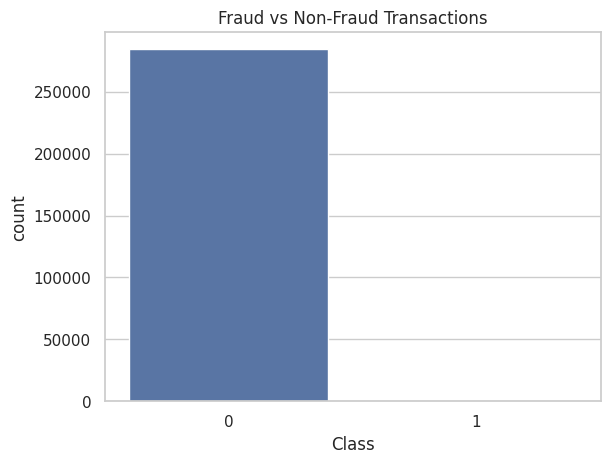

Non-Fraud: 284315
Fraud: 492
Fraud Percentage: 0.1727 %


In [7]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

fraud_count = df['Class'].value_counts()
print("Non-Fraud:", fraud_count[0])
print("Fraud:", fraud_count[1])
print("Fraud Percentage:", round((fraud_count[1] / len(df)) * 100, 4), "%")


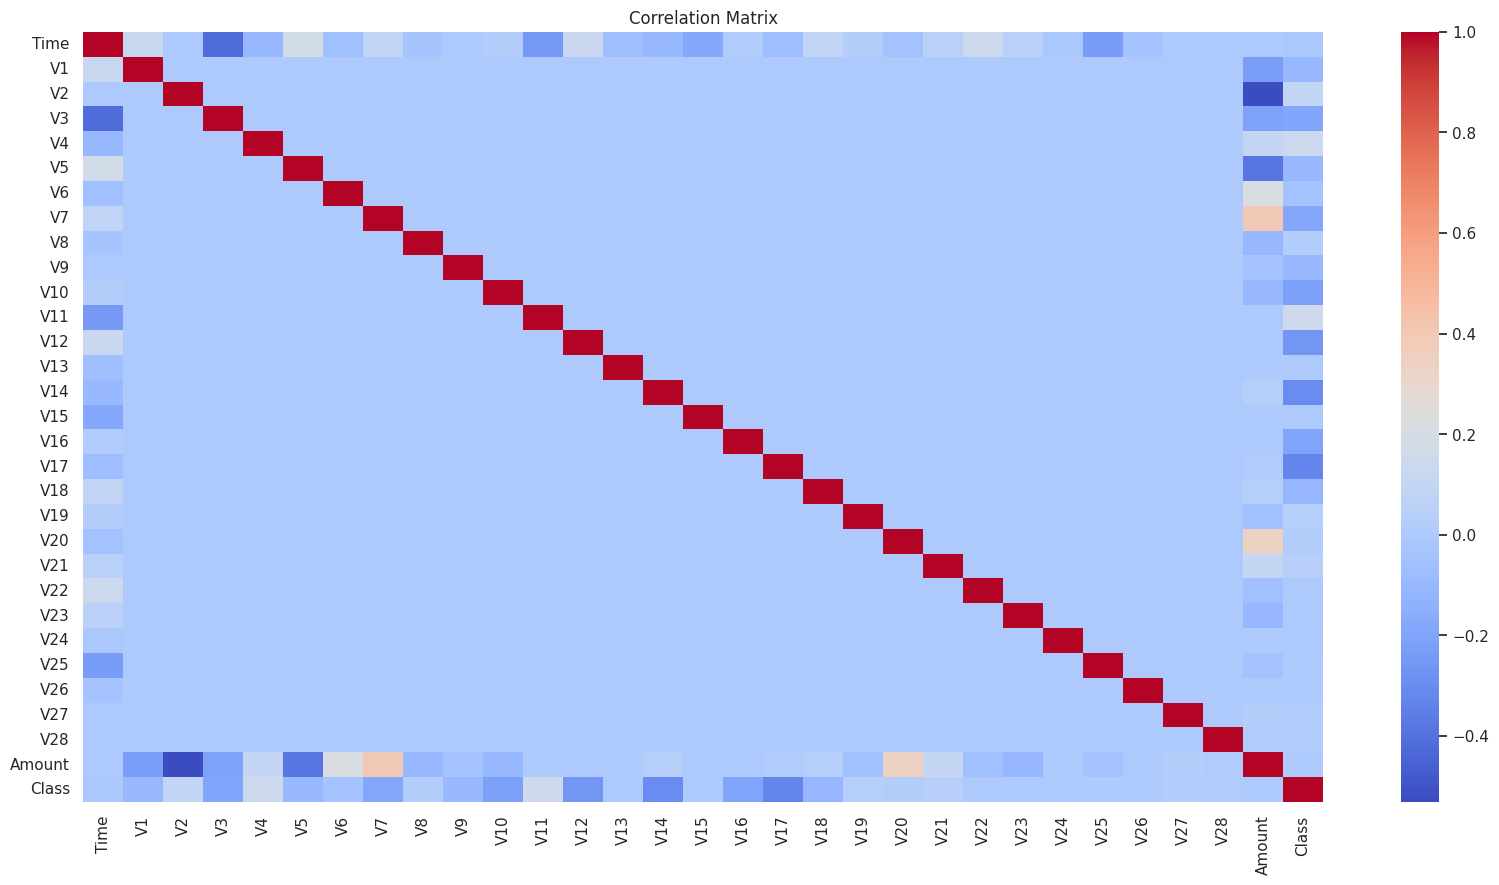

In [8]:
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


In [9]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Amount', 'Time'], axis=1)


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [11]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


In [12]:
lr = LogisticRegression()
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


KeyboardInterrupt: 

In [17]:
rf = RandomForestClassifier(n_estimators=25, random_state=42)


In [18]:
X_res_sample = X_res.sample(n=20000, random_state=42)
y_res_sample = y_res.loc[X_res_sample.index]

rf.fit(X_res_sample, y_res_sample)


RandomForestClassifier(n_estimators=25, random_state=42)

In [19]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_res, y_res)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.81      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



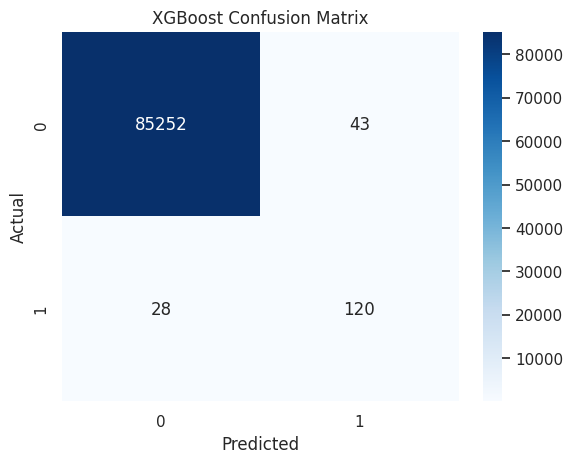

In [20]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


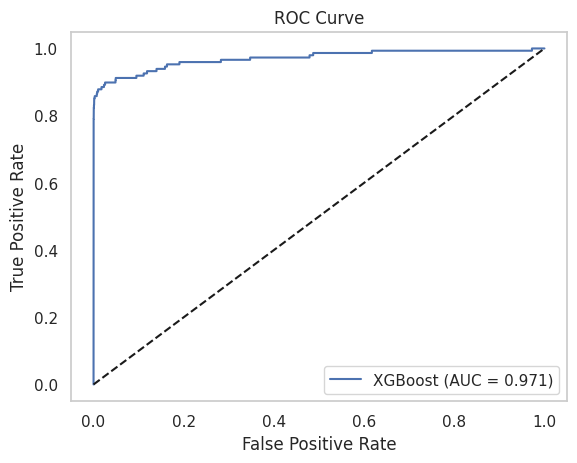

In [21]:
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.3f)' % roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [22]:
joblib.dump(xgb, 'xgb_fraud_model.pkl')


['xgb_fraud_model.pkl']

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'class_weight': ['balanced']
}


In [24]:
# Initialize base model
rf_base = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='f1',  # good for imbalanced classification
    cv=3,          # 3-fold cross-validation
    verbose=2,
    n_jobs=-1      # use all available cores
)


In [25]:
# Use a sample for faster execution
X_sample = X_res.sample(n=10000, random_state=42)
y_sample = y_res.loc[X_sample.index]

grid_search.fit(X_sample, y_sample)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=2)

In [26]:
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# AUC
auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])
print("ROC AUC Score:", auc_score)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.31      0.84      0.45       148

    accuracy                           1.00     85443
   macro avg       0.65      0.92      0.72     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9775449037759255


In [28]:
import joblib
joblib.dump(best_rf, 'rf_best_model.pkl')


['rf_best_model.pkl']

In [29]:
!pip install xgboost


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [31]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 5, 10]  # helps with class imbalance
}


In [32]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2
)


In [33]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2
)


In [34]:
grid_search.fit(X_sample, y_sample)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.8, 1]},
             scoring='f1', verbose=2)

In [35]:
print("Best parameters found:\n", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


Best parameters found:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'scale_pos_weight': 10, 'subsample': 0.8}


In [36]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.86      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443

ROC AUC Score: 0.9756034303838982


In [37]:
import joblib
joblib.dump(best_xgb, 'xgb_best_model.pkl')


['xgb_best_model.pkl']

In [38]:
!pip install shap


In [39]:
import shap


In [40]:
# Use TreeExplainer for XGBoost models
explainer = shap.TreeExplainer(best_xgb)


In [41]:
# Only use a subset for speed
X_explain = X_test.sample(n=100, random_state=42)

# Calculate SHAP values
shap_values = explainer.shap_values(X_explain)


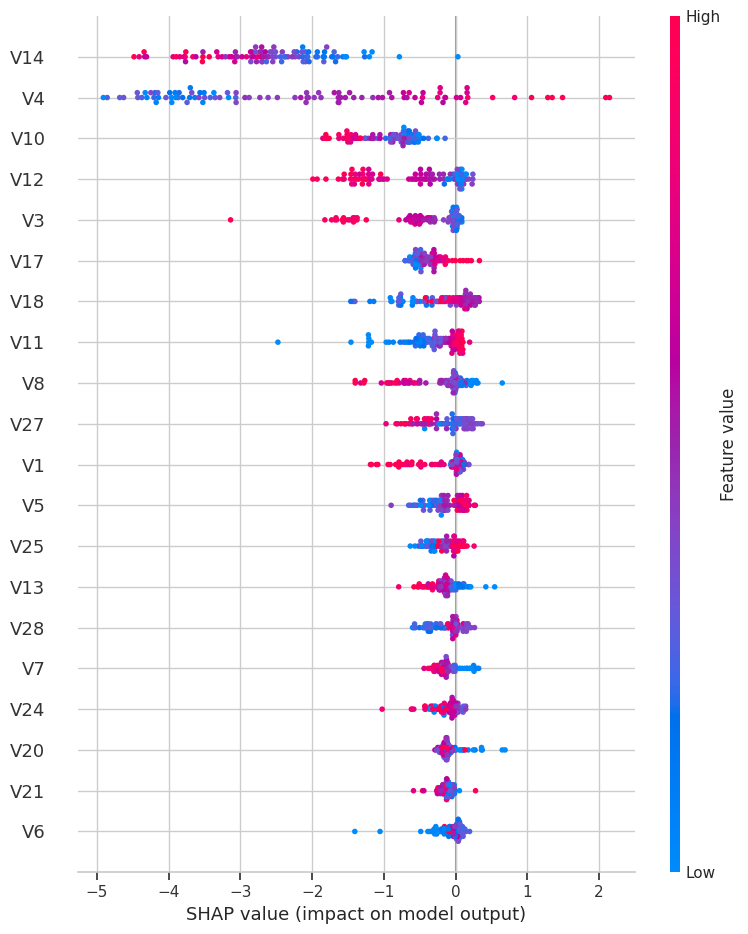

In [42]:
shap.summary_plot(shap_values, X_explain)


In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_explain.iloc[0])


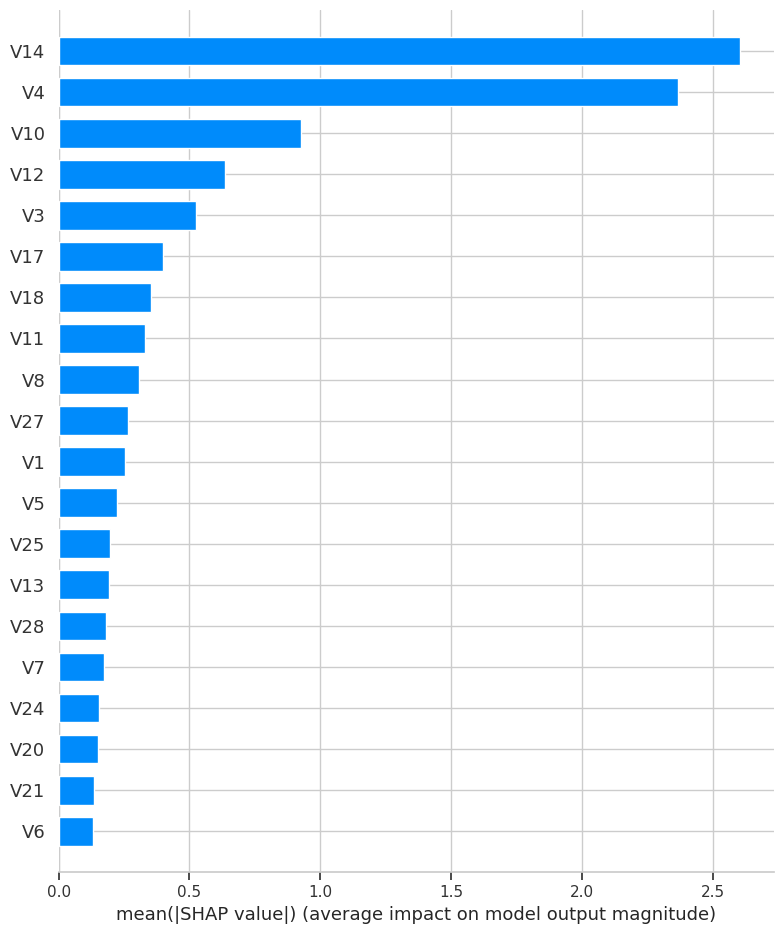

In [44]:
shap.summary_plot(shap_values, X_explain, plot_type="bar")


In [45]:
!pip install gradio


In [46]:
import joblib




In [47]:
import numpy as np

feature_names = X_test.columns.tolist()

def predict_fraud(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    prediction = best_xgb.predict(input_array)[0]
    prob = best_xgb.predict_proba(input_array)[0][1]
    result = "🔴 Fraud" if prediction == 1 else "🟢 Not Fraud"
    return f"{result} (Probability: {prob:.2f})"


In [48]:
import gradio as gr

# Create input fields dynamically for each feature
inputs = [gr.Number(label=feature) for feature in feature_names]
output = gr.Textbox(label="Prediction")

demo = gr.Interface(
    fn=predict_fraud,
    inputs=inputs,
    outputs=output,
    title="💳 Credit Card Fraud Detection",
    description="Enter transaction features to check if it's likely fraud.",
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82874c2fd558d26b1f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [62]:
import joblib
joblib.dump(best_xgb, 'xgb_best_model.pkl')


['xgb_best_model.pkl']

In [63]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [64]:
import json
with open('features.json', 'w') as f:
    json.dump(X_train.columns.tolist(), f)


In [65]:
from google.colab import files
files.download('xgb_best_model.pkl')
files.download('scaler.pkl')
files.download('features.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>